## PART--I

### Create a Python Script Using Pandas to Load, Process, and Plot the Data

In [1]:
## DATA IS TAKEN FROM SENSOR_0 AND WE WILL USE IT FOR ANOTHER SENSORS

###  (a) LOADING AND CLEANING PROCESS:

In [2]:
import pandas as pd
df = pd.read_csv('sensor_1.csv')

def load_data(df):

#def file_load():


    df_cleaned= df.drop('coil_reversed',axis =1) #DROPPING THE NULL COLUMN
#for i in df_cleaned.columns:   # CASUAL CHECK FOR ANY NULL VALUE COLUMN EXITS OR NOT
        #if df_cleaned[i].isna().any()!=0:
          #print(i)
    for cols in df_cleaned.columns: 
        
        if df_cleaned[cols].dtypes== "int64":  
            
            df_cleaned[cols].fillna(df_cleaned[cols].mean(),inplace = True) #IDENTIFYING AND CLEANNING THE DATA WITH IMPUTATION 
            
        elif df_cleaned[cols].dtypes== "float64":
            
            df_cleaned[cols].fillna(df_cleaned[cols].mean(),inplace = True) #IDENTIFYING AND CLEANNING THE DATA WITH IMPUTATION
            
    return df_cleaned # RETURN THE CLEANED DATA SET

### CLEANED DATA

In [3]:
df_cleaned=load_data(df) # LOAD THE DATA

In [4]:
df_cleaned # DATA IS NOW CLEANED WITH THE NO NULL VALUE

,Unnamed: 0.1,Unnamed: 0,device,event_id,channel,timestamp_tz,active_power,active_power_delta,apparent_power,complete,...,harmonic_real_1,harmonic_real_2,harmonic_real_3,harmonic_real_4,harmonic_real_5,harmonic_real_6,harmonic_real_7,harmonic_real_8,harmonic_real_9,hour
0,183,3157,1,190681,1,2020-06-16 20:02:05.000000,338,0.0,543.773197,True,...,-1869,-4,-429,-8,-135,-14,-130,-31,-169,20
1,1902,5683,1,193250,1,2020-06-18 09:42:14.000000,1450,1262.0,1509.000000,False,...,-9065,-9,-478,-6,-204,-4,-19,0,-31,9
2,3100,6458,1,194059,1,2020-06-18 19:52:32.000000,2185,2051.0,2196.000000,True,...,-13350,0,-397,0,132,16,59,18,-18,19
3,4204,4875,1,192440,1,2020-06-17 20:33:12.000000,2260,0.0,2263.000000,True,...,-13437,-23,-519,-14,100,-6,61,-3,-168,20
4,3739,6375,1,193976,1,2020-06-18 18:38:35.000000,99,0.0,209.000000,True,...,-600,6,-425,3,-234,-4,-18,-4,19,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730,2121,6246,1,193847,1,2020-06-18 17:51:48.000000,3618,1830.0,3618.000000,True,...,-22306,0,-315,0,247,0,193,0,90,17
6731,364,3769,1,191293,1,2020-06-17 06:02:52.000000,60,0.0,183.000000,True,...,-424,1,-247,3,-113,-1,3,3,-33,6
6732,1085,1734,1,189250,1,2020-06-16 00:44:06.000000,178,0.0,249.000000,True,...,-1074,-28,-204,-14,-21,3,33,8,-54,0
6733,4743,3454,1,190978,1,2020-06-17 00:52:54.000000,67,0.0,190.000000,True,...,-333,3,-297,-1,-242,9,-128,0,-89,0


### PROCESS THE DATA

In [5]:
from sklearn.preprocessing import Normalizer

def process(df_cleaned): # USING THE CLEANED DATA FOR THE FURTHER PROCESSING
    
    f1 = df_cleaned.loc[:,'peak_1':'peak_10'] 
    
    f4 = pd.concat([f1,df_cleaned.loc[:,'current']],axis = 1)
    
    dataframe=[]   # CREATING A EMPTY DATAFRAME TO STORE THE TRANSIENTS COLUMNS
    
    for i in f4.columns[0:-1]: # USED FOR LOOP TO CALCULATE TRANSIENTS 1-10
        
        f7=f4['current']-f4[i]
        
        dataframe.append(f7)
        
    final_dataframe= pd.concat(dataframe,axis=1)
    
    final_dataframe.columns= ['transients_1','transients_2','transients_3','transients_4','transients_5','transients_6',
                              'transients_7','transients_8','transients_9','transients_10'] # NAMING COLUMNS
    array = final_dataframe.values

    Normalised = Normalizer(norm="l2").fit_transform(array) ## NORMALISING TRANSIENTS COLUMNS WITH L2 NORM

    Normalised_data = pd.DataFrame(Normalised,columns = ['normalised_transients_1','normasalied_transients_2',
                                                         'normalised_transients_3','normalised_transients_4','normalised_transients_5','normalised_transients_6','normalised_transients_7','normalised_transients_8','normalised_transients_9','normalised_transients_10'])

    final = pd.concat([df_cleaned,final_dataframe,Normalised_data],axis = 1) #CONCATINATING WITH THE ORGINAL DATAFRAME

    final['trasient_mean'] = final.loc[:,'transients_1':'transients_10'].mean(axis = 1,skipna = True) # ADDING MEAN TRANSIENT COL.

    final['trasient_Stan.Dev']=final.loc[:,'transients_1':'transients_10'].std(axis = 1,skipna = True)# ADDING STD. TRANSIENT COL.

    final['mean_high_trasient'] = final.loc[:,'transients_1':'transients_7'].mean(axis = 1,skipna = True)#HIGHEST 7 TRANSIENT
    
    return final



In [64]:
df_final= process(df_cleaned) 
 
import matplotlib.pyplot as plt

%matplotlib inline

df_final

,Unnamed: 0.1,Unnamed: 0,device,event_id,channel,timestamp_tz,active_power,active_power_delta,apparent_power,complete,...,normalised_transients_4,normalised_transients_5,normalised_transients_6,normalised_transients_7,normalised_transients_8,normalised_transients_9,normalised_transients_10,trasient_mean,trasient_Stan.Dev,mean_high_trasient
0,183,3157,1,190681,1,2020-06-16 20:02:05.000000,338,0.0,543.773197,True,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1902,5683,1,193250,1,2020-06-18 09:42:14.000000,1450,1262.0,1509.000000,False,...,-0.316080,-0.305879,-0.294300,-0.236819,0.574769,-0.080777,-0.018196,-1.209434,2.054816,-2.220857
2,3100,6458,1,194059,1,2020-06-18 19:52:32.000000,2185,2051.0,2196.000000,True,...,-0.130763,-0.128796,-0.128140,-0.126173,0.927494,-0.113844,-0.104138,-0.145834,2.536840,-0.981143
3,4204,4875,1,192440,1,2020-06-17 20:33:12.000000,2260,0.0,2263.000000,True,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3739,6375,1,193976,1,2020-06-18 18:38:35.000000,99,0.0,209.000000,True,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730,2121,6246,1,193847,1,2020-06-18 17:51:48.000000,3618,1830.0,3618.000000,True,...,-0.361254,-0.338909,-0.350082,-0.331460,-0.320287,-0.312839,-0.305390,-0.083700,0.015056,-0.083571
6731,364,3769,1,191293,1,2020-06-17 06:02:52.000000,60,0.0,183.000000,True,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6732,1085,1734,1,189250,1,2020-06-16 00:44:06.000000,178,0.0,249.000000,True,...,-0.706565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.266876,0.562624,-0.381251
6733,4743,3454,1,190978,1,2020-06-17 00:52:54.000000,67,0.0,190.000000,True,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.157107,0.496817,-0.224439


In [7]:
def show_features(t,x): # CREATING FUNCTION TO GET THE OUTPUT AS A PLOT
    
    return plt.stackplot(t,x,baseline = 'zero')
        

### (b) FEATURE EXTRACTION AND PLOTTING

#### PLOT (AVTIVE POWER vs Time)

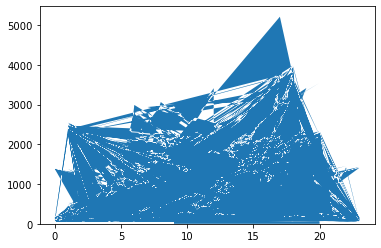

In [8]:
show_features(df_final['hour'],df_final['active_power'])

#### PLOT (REAVTIVE POWER vs Time)

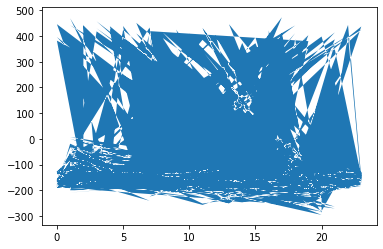

In [9]:
show_features(df_final['hour'],df_final['reactive_power'])

#### PLOT (ENERGY vs Time)

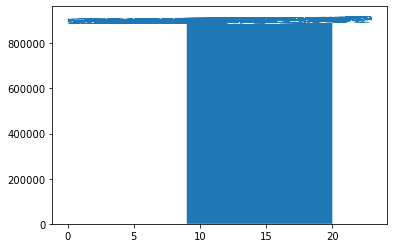

In [11]:
show_features(df_final['hour'],df_final['energy'])

In [12]:
import os

os.getcwd()

os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'fridge_data.csv',
 'sensor_0.csv',
 'sensor_1.csv',
 'sensor_10.csv',
 'sensor_12.csv',
 'sensor_2.csv',
 'sensor_3.csv',
 'sensor_4.csv',
 'sensor_5.csv',
 'sensor_6.csv',
 'sensor_7.csv',
 'sensor_8.csv',
 'sensor_9.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 '__MACOSX']

### FOR ANOTHER SENSOR - 2 (FOLLOWING THE SAME STEPS)

In [13]:
df = pd.read_csv("sensor_2.csv")

import numpy as np

load_data(df)

,Unnamed: 0.1,Unnamed: 0,device,event_id,channel,timestamp_tz,active_power,active_power_delta,apparent_power,complete,...,harmonic_real_1,harmonic_real_2,harmonic_real_3,harmonic_real_4,harmonic_real_5,harmonic_real_6,harmonic_real_7,harmonic_real_8,harmonic_real_9,hour
0,7080,3411,2,592459,1,2020-06-17 05:42:25,118,58.0,166.000000,False,...,-882,-1,-396,0,-155,0,18,-1,90,5
1,4441,623,2,589650,1,2020-06-15 10:09:09.000000,90,0.0,124.000000,True,...,-613,-29,-432,-4,-207,6,-59,11,-1,10
2,6557,4417,2,593465,1,2020-06-17 14:46:16,102,0.0,347.212368,True,...,-668,-9,-318,3,-118,-6,-57,3,-6,14
3,2828,5367,2,594422,1,2020-06-18 05:05:44.000000,50,-83.0,74.000000,True,...,-160,0,-117,0,-66,0,-33,0,0,5
4,5303,2590,2,591618,1,2020-06-16 17:34:29.000000,323,0.0,366.000000,True,...,-2077,1,-673,-6,-34,0,181,1,79,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7088,300,6825,2,595893,1,2020-06-18 19:57:16,18,0.0,33.000000,True,...,-112,-1,-97,0,-64,1,-59,0,-34,19
7089,6296,2639,2,591668,1,2020-06-16 18:21:01,259,-4.0,343.000000,True,...,-1570,-24,-729,-11,1,-24,226,-11,110,18
7090,4889,183,2,589210,1,2020-06-15 03:02:25.000000,111,0.0,136.000000,True,...,-727,-9,-103,-1,-82,0,-54,0,-21,3
7091,2349,1958,2,590986,1,2020-06-16 07:24:38.000000,20,0.0,35.000000,True,...,-135,3,-99,6,-74,1,-52,3,-28,7


In [14]:
process(df_cleaned)

,Unnamed: 0.1,Unnamed: 0,device,event_id,channel,timestamp_tz,active_power,active_power_delta,apparent_power,complete,...,normalised_transients_4,normalised_transients_5,normalised_transients_6,normalised_transients_7,normalised_transients_8,normalised_transients_9,normalised_transients_10,trasient_mean,trasient_Stan.Dev,mean_high_trasient
0,183,3157,1,190681,1,2020-06-16 20:02:05.000000,338,0.0,543.773197,True,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1902,5683,1,193250,1,2020-06-18 09:42:14.000000,1450,1262.0,1509.000000,False,...,-0.316080,-0.305879,-0.294300,-0.236819,0.574769,-0.080777,-0.018196,-1.209434,2.054816,-2.220857
2,3100,6458,1,194059,1,2020-06-18 19:52:32.000000,2185,2051.0,2196.000000,True,...,-0.130763,-0.128796,-0.128140,-0.126173,0.927494,-0.113844,-0.104138,-0.145834,2.536840,-0.981143
3,4204,4875,1,192440,1,2020-06-17 20:33:12.000000,2260,0.0,2263.000000,True,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3739,6375,1,193976,1,2020-06-18 18:38:35.000000,99,0.0,209.000000,True,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6730,2121,6246,1,193847,1,2020-06-18 17:51:48.000000,3618,1830.0,3618.000000,True,...,-0.361254,-0.338909,-0.350082,-0.331460,-0.320287,-0.312839,-0.305390,-0.083700,0.015056,-0.083571
6731,364,3769,1,191293,1,2020-06-17 06:02:52.000000,60,0.0,183.000000,True,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6732,1085,1734,1,189250,1,2020-06-16 00:44:06.000000,178,0.0,249.000000,True,...,-0.706565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.266876,0.562624,-0.381251
6733,4743,3454,1,190978,1,2020-06-17 00:52:54.000000,67,0.0,190.000000,True,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.157107,0.496817,-0.224439


In [15]:
df_final= process(df_cleaned) 

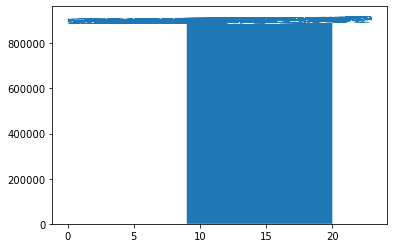

In [18]:
show_features(df_final['hour'],df_final['energy'])

## PART--II

### MODEL TO PREDICT EVENT TYPE

In [19]:
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv("fridge_data.csv")

df

,index,active_power,active_power_delta,apparent_power,appliance_name,channel,coil_reversed,complete,current,device,...,transient_2,transient_3,transient_4,transient_5,transient_6,transient_7,transient_8,transient_9,voltage,wifi_strength
0,68407,496.0,0.0,614.0,NaN,1,NaN,True,2.793,10050,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,219.912,64.0
1,14208,141.0,0.0,205.0,NaN,1,NaN,True,0.920,3818,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,223.389,67.0
2,67402,3203.0,1219.0,3203.0,NaN,1,NaN,False,15.552,10050,...,-0.163,-0.130,0.037,0.250,-0.031,-0.156,-0.156,-0.156,206.005,0.0
3,29594,230.0,0.0,307.0,NaN,1,NaN,True,1.448,4302,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,212.089,72.0
4,3464,1551.0,81.0,1585.0,NaN,1,NaN,False,6.882,3004,...,0.490,0.216,-0.081,-0.193,0.097,-0.023,0.038,0.001,230.343,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,24337,0.0,0.0,9.0,NaN,1,NaN,True,0.042,4111,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,212.958,72.0
79996,45587,365.0,43.0,945.0,NaN,1,NaN,False,4.232,10033,...,-0.923,-0.967,-1.076,-1.003,-1.018,-0.895,-0.812,-0.667,223.389,33.0
79997,78581,1937.0,-12.0,1981.0,NaN,1,NaN,True,9.081,10056,...,0.101,0.183,0.112,0.201,0.223,0.187,0.063,0.094,218.174,77.0
79998,26777,2535.0,107.0,2636.0,NaN,1,NaN,True,12.328,4111,...,-0.298,-0.183,-0.005,0.033,-0.044,-0.165,-0.265,-0.191,213.828,64.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 80000 non-null  int64  
 1   active_power          79991 non-null  float64
 2   active_power_delta    79865 non-null  float64
 3   apparent_power        79827 non-null  float64
 4   appliance_name        1776 non-null   object 
 5   channel               80000 non-null  int64  
 6   coil_reversed         1776 non-null   float64
 7   complete              79865 non-null  object 
 8   current               79865 non-null  float64
 9   device                80000 non-null  int64  
 10  energy                80000 non-null  float64
 11  event_type            80000 non-null  object 
 12  firmware              79865 non-null  float64
 13  harmonic_ratio_1      79857 non-null  float64
 14  harmonic_ratio_2      79844 non-null  float64
 15  harmonic_ratio_3   

In [21]:
df.describe()

,index,active_power,active_power_delta,apparent_power,channel,coil_reversed,current,device,energy,firmware,...,transient_2,transient_3,transient_4,transient_5,transient_6,transient_7,transient_8,transient_9,voltage,wifi_strength
count,80000.000000,79991.000000,79865.000000,79827.000000,80000.0,1776.000000,79865.000000,80000.000000,8.000000e+04,79865.000000,...,79831.000000,79843.000000,79835.000000,79853.000000,79821.000000,79837.000000,79850.000000,79836.000000,79865.000000,79865.000000
mean,44028.218363,532.916664,17.729807,611.151903,1.0,0.854167,2.710467,7182.157050,1.290393e+05,87.959319,...,0.318209,0.317792,0.307077,0.301448,0.286317,0.267450,0.250170,0.230166,225.080275,57.941451
std,26493.524220,682.837475,393.013297,689.384467,0.0,0.353038,3.078668,3206.285012,5.784301e+05,6.483525,...,2.044487,2.036155,1.794325,1.968014,1.920397,1.617593,1.771865,1.698797,11.547651,23.232991
min,0.000000,0.000000,-6139.000000,7.000000,1.0,0.000000,0.036000,2039.000000,0.000000e+00,41.000000,...,-16.089000,-16.423000,-10.929000,-15.448000,-21.812000,-10.974000,-17.731000,-16.947000,110.573000,-97.000000
25%,20978.750000,126.000000,-1.000000,175.000000,1.0,1.000000,0.787000,3907.000000,1.642765e+04,89.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,217.305000,50.000000
50%,43990.500000,273.000000,0.000000,346.000000,1.0,1.000000,1.504000,10032.000000,4.326084e+04,89.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,222.520000,64.000000
75%,66985.250000,598.000000,6.000000,762.000000,1.0,1.000000,3.344000,10050.000000,8.174612e+04,89.000000,...,0.005000,0.004000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,232.081000,70.000000
max,89999.000000,8151.000000,6316.000000,8151.000000,1.0,1.000000,33.734000,10996.000000,1.111476e+07,89.000000,...,38.874000,38.775000,38.576000,38.487000,37.794000,31.487000,32.561000,25.553000,293.449000,96.000000


In [22]:
df.isna().any().sum()

33

In [23]:
df['event_type'].unique()

array(['KA', 'ON', 'OFF'], dtype=object)

In [24]:
for cols in df.columns:
    if df[cols].isna().sum() == 0:
        print(cols)

index
channel
device
energy
event_type
seq_id
timestamp


In [25]:
for cols in df.columns:                  # FINDING OUT OBJECT COLUMNS
    if df[cols].dtypes =='object':
        print(cols)

appliance_name
complete
event_type
timestamp


In [26]:
df.drop(['appliance_name','complete','channel','timestamp','index','channel'],axis = 1,inplace = True) 

# DROPPING COLUMNS WITH LESS RELEVANCE WITH THE TARGET VARIABLE

In [27]:
#df['coil_reversed'].(1)

In [28]:
df['coil_reversed'].fillna(df['coil_reversed'].mode()[0],inplace = True) # TREATING THE MISSING VALUE

(array([79802.,   189.]),
 array([   0. , 4075.5, 8151. ]),
 <BarContainer object of 2 artists>)

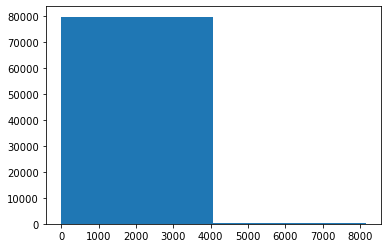

In [29]:
plt.hist(x=df['active_power'],bins = 2)

In [30]:
df['active_power'].fillna(2050,inplace = True)

In [31]:
#df.drop('channel',axis = 1,inplace = True)

(array([  259., 79741.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

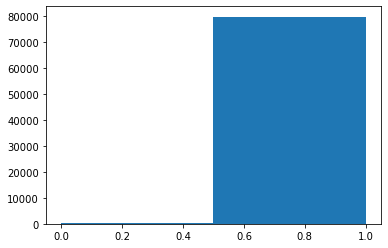

In [32]:
plt.hist(x=df['coil_reversed'],bins = 2)

In [33]:
df['coil_reversed'].fillna(df['coil_reversed'].mode()[0],inplace = True) #FILLING WITH MOST FREQUENT VALUE

(array([2.0000e+00, 2.6000e+01, 1.1000e+02, 1.1870e+03, 6.7804e+04,
        9.7100e+03, 8.8500e+02, 1.0900e+02, 2.7000e+01, 5.0000e+00]),
 array([-6139. , -4893.5, -3648. , -2402.5, -1157. ,    88.5,  1334. ,
         2579.5,  3825. ,  5070.5,  6316. ]),
 <BarContainer object of 10 artists>)

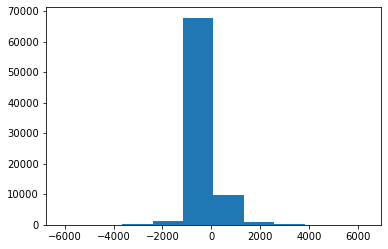

In [34]:
plt.hist(x = df['active_power_delta'])

In [35]:
df['active_power_delta'].fillna(df['active_power_delta'].mean(),inplace = True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   active_power          80000 non-null  float64
 1   active_power_delta    80000 non-null  float64
 2   apparent_power        79827 non-null  float64
 3   coil_reversed         80000 non-null  float64
 4   current               79865 non-null  float64
 5   device                80000 non-null  int64  
 6   energy                80000 non-null  float64
 7   event_type            80000 non-null  object 
 8   firmware              79865 non-null  float64
 9   harmonic_ratio_1      79857 non-null  float64
 10  harmonic_ratio_2      79844 non-null  float64
 11  harmonic_ratio_3      79865 non-null  float64
 12  harmonic_ratio_4      79843 non-null  float64
 13  harmonic_ratio_5      79865 non-null  float64
 14  harmonic_ratio_6      79863 non-null  float64
 15  harmonic_ratio_7   

In [37]:
df['harmonic_ratio_2'].describe() # WE SEE THAT THESE DATA CONTAINS 'INF' VALUES SO WE WILL REPLACE THOSE VALUES

count    7.984400e+04
mean              inf
std               NaN
min      0.000000e+00
25%      2.439024e-02
50%      1.413273e-01
75%      4.328358e-01
max               inf
Name: harmonic_ratio_2, dtype: float64

In [38]:
df.replace(np.inf,np.nan,inplace = True) ## REPLACING INF VALUES WITH NAN

In [39]:
for cols in df.columns: 
        
        if df[cols].dtypes== "int64":  
            
            df[cols].fillna(df[cols].mean(),inplace = True) #IDENTIFYING AND CLEANNING THE DATA WITH IMPUTATION 
            
        elif df[cols].dtypes== "float64":
            
            df[cols].fillna(df[cols].mean(),inplace = True) #IDENTIFYING AND CLEANNING THE DATA WITH IM

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   active_power          80000 non-null  float64
 1   active_power_delta    80000 non-null  float64
 2   apparent_power        80000 non-null  float64
 3   coil_reversed         80000 non-null  float64
 4   current               80000 non-null  float64
 5   device                80000 non-null  int64  
 6   energy                80000 non-null  float64
 7   event_type            80000 non-null  object 
 8   firmware              80000 non-null  float64
 9   harmonic_ratio_1      80000 non-null  float64
 10  harmonic_ratio_2      80000 non-null  float64
 11  harmonic_ratio_3      80000 non-null  float64
 12  harmonic_ratio_4      80000 non-null  float64
 13  harmonic_ratio_5      80000 non-null  float64
 14  harmonic_ratio_6      80000 non-null  float64
 15  harmonic_ratio_7   

In [41]:
# TARGET AND FEATURE SELECTION

In [42]:
X = df.drop(['event_type'],axis =1)

y = df['event_type']  #TARGET VARIABLE

In [43]:
X.describe()

,active_power,active_power_delta,apparent_power,coil_reversed,current,device,energy,firmware,harmonic_ratio_1,harmonic_ratio_2,...,transient_2,transient_3,transient_4,transient_5,transient_6,transient_7,transient_8,transient_9,voltage,wifi_strength
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.0,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,533.087336,17.729807,611.151903,0.996762,2.710467,7182.157050,1.290393e+05,87.959319,1.0,0.372230,...,0.318209,0.317792,0.307077,0.301448,0.286317,0.267450,0.250170,0.230166,225.080275,57.941451
std,682.988623,392.681548,688.638657,0.056807,3.076070,3206.285012,5.784301e+05,6.478052,0.0,0.943389,...,2.042326,2.034156,1.792473,1.966205,1.918247,1.615944,1.770203,1.697055,11.537903,23.213380
min,0.000000,-6139.000000,7.000000,0.000000,0.036000,2039.000000,0.000000e+00,41.000000,1.0,0.000000,...,-16.089000,-16.423000,-10.929000,-15.448000,-21.812000,-10.974000,-17.731000,-16.947000,110.573000,-97.000000
25%,126.000000,-1.000000,176.000000,1.000000,0.788000,3907.000000,1.642765e+04,89.000000,1.0,0.024507,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,217.305000,50.000000
50%,273.000000,0.000000,347.000000,1.000000,1.507000,10032.000000,4.326084e+04,89.000000,1.0,0.141964,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,222.520000,64.000000
75%,598.250000,6.000000,760.000000,1.000000,3.339000,10050.000000,8.174612e+04,89.000000,1.0,0.432432,...,0.006000,0.005000,0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,232.081000,70.000000
max,8151.000000,6316.000000,8151.000000,1.000000,33.734000,10996.000000,1.111476e+07,89.000000,1.0,117.000000,...,38.874000,38.775000,38.576000,38.487000,37.794000,31.487000,32.561000,25.553000,293.449000,96.000000


In [45]:
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
## LOGISTIC REGRESSION

In [50]:
lr =  LogisticRegression()

lr.fit(X_train,y_train)

y_pred_train_lr = lr.predict(X_train)

y_pred_test_lr= lr.predict(X_test)

acc_test_lr = accuracy_score(y_test, y_pred_test_lr)

acc_test_lr


0.7532

In [ ]:
## RANDOM FOREST CLASSIFIER

In [51]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_train_rf = rf.predict(X_train)

y_pred_test_rf = rf.predict(X_test)

acc_test_rf = accuracy_score(y_test, y_pred_test_rf)

acc_test_rf

0.99995

In [ ]:
## KNN - NEAREST NEIGHBORS

['OFF' 'KA' 'KA' ... 'KA' 'ON' 'ON'] 1
['OFF' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 2
['OFF' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 3
['OFF' 'KA' 'KA' ... 'KA' 'OFF' 'KA'] 4
['OFF' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 5
['OFF' 'KA' 'KA' ... 'KA' 'ON' 'OFF'] 6
['OFF' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 7
['OFF' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 8
['OFF' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 9
['OFF' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 10
['OFF' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 11
['OFF' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 12
['OFF' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 13
['OFF' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 14
['KA' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 15
['KA' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 16
['KA' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 17
['KA' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 18
['KA' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 19
['KA' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 20
['KA' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 21
['KA' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 22
['KA' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 23
['KA' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 24
['KA' 'KA' 'KA' ... 'KA' 'ON' 'KA'] 25


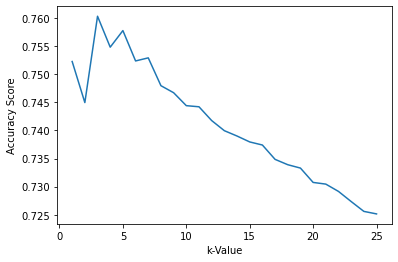

In [57]:
k_range = list(range(1,26))

scores = []

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train,y_train)
    
    y_pred_knn = knn.predict(X_test)
    
    scores.append(metrics.accuracy_score(y_test,y_pred_knn))
    
    print(y_pred_knn,k)
    
plt.plot(k_range,scores)

plt.xlabel("k-Value")

plt.ylabel("Accuracy Score")

plt.show()

In [ ]:
# K - FOLD CROSS VALIDATION

In [58]:
from sklearn.model_selection import StratifiedKFold,KFold, cross_val_score

from sklearn import linear_model,ensemble

In [59]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [60]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")

print(f'Scores for each fold are: {score}')

print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.999875 0.999875 1.       0.999875 0.999625 1.       1.       1.
 1.       0.99975 ]
Average score: 1.00


#### We see that model predicts the best accuracy of almost 100%